# Usage (details: policy measures)
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.12.0-phi.new.339.357.359.362.366.367.382.383.389.408.fix.360.373.406'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


196

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **16th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{2: ['Timor-Leste', 'Solomon Islands', 'Holy See'],
 3: ['Tanzania', 'Laos', 'Saint Kitts and Nevis'],
 4: ['Brunei', 'Grenada', 'Saint Lucia', 'Dominica'],
 5: ['Equatorial Guinea', 'Fiji'],
 6: ['Antigua and Barbuda', 'Mauritius', 'Saint Vincent and the Grenadines'],
 7: ['Gambia'],
 8: ['Trinidad and Tobago', 'Seychelles', 'Liechtenstein', 'Madagascar',
     'Vietnam', 'Monaco', 'Bahamas', 'Kyrgyzstan', 'Northern Mariana Islands',
     'Cambodia', 'Lesotho'],
 9: ['Bolivia', 'Djibouti', 'Jamaica', 'Belize', 'Namibia', 'South Africa',
     'Uzbekistan', 'Zambia', 'Bermuda', 'Virgin Islands, U.S.', 'Burundi',
     'Kazakhstan', 'Republic of the Congo', 'Barbados', 'Zimbabwe', 'Swaziland',
     'Oman', 'Australia', 'Ghana', 'Sao Tome and Principe', 'Suriname',
     'Malawi', 'Papua New Guinea'],
 10: ['Eritrea', 'Libya', 'Guyana', 'Dominican Republic', 'Benin', 'Maldives',
      'Guatemala', 'Angola', 'Singapore', 'Israel', 'Kenya', 'Rwanda',
      "Cote d'Ivoire", 'Comoros', 'Mongolia

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=16)
# The number of countries
len(analyser.countries)

6

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{16: ['Netherlands', 'Portugal', 'Canada', 'Belgium', 'France',
      'United Kingdom']}


In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country        Phase                                        
Netherlands    0th    Past  11Mar2020  31Mar2020    17231624
               1st    Past  01Apr2020  16Apr2020    17231624
               2nd    Past  17Apr2020  22May2020    17231624
               3rd    Past  23May2020  07Aug2020    17231624
               4th    Past  08Aug2020  04Sep2020    17231624
...                    ...        ...        ...         ...
United Kingdom 11th   Past  06Nov2020  11Nov2020    66460344
               12th   Past  12Nov2020  17Nov2020    66460344
               13th   Past  18Nov2020  24Nov2020    66460344
               14th   Past  25Nov2020  03Dec2020    66460344
               15th   Past  04Dec2020  12Dec2020    66460344

[96 rows x 4 columns]

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF, timeout=10)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	NLD,  1st phase (01Apr2020 - 16Apr2020): finished  277 trials in 0 min 10 sec

	NLD,  5th phase (05Sep2020 - 18Sep2020): finished  291 trials in 0 min 10 sec

	NLD,  3rd phase (23May2020 - 07Aug2020): finished  273 trials in 0 min 10 sec

	NLD,  2nd phase (17Apr2020 - 22May2020): finished  275 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	CAN,  2nd phase (29Apr2020 - 14May2020): finished  320 trials in 0 min 10 sec

	NLD, 11th phase (04Nov2020 - 13Nov2020): finished  323 trials in 0 min 10 sec

	PRT,  3rd phase (21May2020 - 18Jun2020): finished  319 trials in 0 min 10 sec

	FRA, 11th phase (22Oct2020 - 31Oct2020): finished  326 trials in 0 min 10 sec

	CAN, 13th phase (21Nov2020 - 27Nov2020): finished  332 trials in 0 min 10 sec

	PRT,  0th phase (14Mar2020 - 01Apr2020): finished  322 trials in 0 min 10 sec

	GBR,  6th phase (18Sep2020 - 02Oct2020): finished  328 trials in 0 min 10 sec

	GBR,  1st phase (07Apr2020 - 23Apr2020): finished  327 trials in 0 min 10 sec

	BEL, 10th phase (23Oct2020 - 01Nov2020): finished  330 trials in 0 min 10 sec

	PRT, 14th phase (23Nov2020 - 03Dec2020): finished  328 trials in 0 min 10 sec

	PRT, 15th phase (04Dec2020 - 12Dec2020): finished  331 trials in 0 min 10 sec

	BEL,  5th phase (23Aug2020 - 14Sep2020): finished  324 trials in 0 min 10 sec

	CAN,  0th phase (26Mar2020 - 13Apr2020): finished  313 trials in 0 min 10 sec

	NLD,  8th phase (05Oct2020 - 14Oct2020): finished  315 trials in 0 min 10 sec

	CAN, 10th phase (29Oct2020 - 06Nov2020): finished  319 trials in 0 min 10 sec

	PRT,  6th phase (26Aug2020 - 15Sep2020): finished  313 trials in 0 min 10 sec

	BEL, 11th phase (02Nov2020 - 07Nov2020): finished  308 trials in 0 min 10 sec

	PRT,  7th phase (16Sep2020 - 01Oct2020): finished  313 trials in 0 min 10 sec

	GBR, 10th phase (26Oct2020 - 05Nov2020): finished  305 trials in 0 min 10 sec

	CAN,  5th phase (21Jul2020 - 29Aug2020): finished  287 trials in 0 min 10 sec

	CAN, 11th phase (07Nov2020 - 13Nov2020): finished  323 trials in 0 min 10 sec

	GBR,  0th phase (18Feb2020 - 06Apr2020): finished  305 trials in 0 min 10 sec

	GBR,  4th phase (12Jun2020 - 16Aug2020): finished  302 trials in 0 min 10 sec

	NLD, 14th phase (26Nov2020 - 01Dec2020): finished  319 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	NLD, 10th phase (25Oct2020 - 03Nov2020): finished  321 trials in 0 min 10 sec

	GBR,  7th phase (03Oct2020 - 11Oct2020): finished  320 trials in 0 min 10 sec

	FRA, 14th phase (24Nov2020 - 02Dec2020): finished  322 trials in 0 min 10 sec

	GBR,  5th phase (17Aug2020 - 17Sep2020): finished  313 trials in 0 min 10 sec

	CAN,  1st phase (14Apr2020 - 28Apr2020): finished  303 trials in 0 min 10 sec

	PRT,  5th phase (15Jul2020 - 25Aug2020): finished  293 trials in 0 min 10 sec

	NLD, 12th phase (14Nov2020 - 19Nov2020): finished  309 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	GBR,  9th phase (20Oct2020 - 25Oct2020): finished  307 trials in 0 min 10 sec

	BEL, 12th phase (08Nov2020 - 14Nov2020): finished  323 trials in 0 min 10 sec

	FRA, 12th phase (01Nov2020 - 10Nov2020): finished  318 trials in 0 min 10 sec

	GBR, 12th phase (12Nov2020 - 17Nov2020): finished  324 trials in 0 min 10 sec

	BEL, 13th phase (15Nov2020 - 22Nov2020): finished  318 trials in 0 min 10 sec

	CAN,  4th phase (05Jun2020 - 20Jul2020): finished  293 trials in 0 min 10 sec

	NLD, 13th phase (20Nov2020 - 25Nov2020): finished  309 trials in 0 min 10 sec

	BEL,  3rd phase (08May2020 - 27Jul2020): finished  286 trials in 0 min 10 sec

	NLD,  4th phase (08Aug2020 - 04Sep2020): finished  301 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	BEL,  4th phase (28Jul2020 - 22Aug2020): finished  312 trials in 0 min 10 sec

	BEL,  9th phase (13Oct2020 - 22Oct2020): finished  312 trials in 0 min 10 sec

	PRT,  1st phase (02Apr2020 - 18Apr2020): finished  312 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	FRA,  8th phase (02Oct2020 - 08Oct2020): finished  312 trials in 0 min 10 sec

	FRA,  3rd phase (09Jul2020 - 18Aug2020): finished  300 trials in 0 min 10 sec

	GBR, 13th phase (18Nov2020 - 24Nov2020): finished  311 trials in 0 min 10 sec

	GBR, 11th phase (06Nov2020 - 11Nov2020): finished  315 trials in 0 min 10 sec

	GBR,  3rd phase (12May2020 - 11Jun2020): finished  306 trials in 0 min 10 sec

	CAN,  8th phase (06Oct2020 - 17Oct2020): finished  311 trials in 0 min 10 sec

	NLD,  7th phase (28Sep2020 - 04Oct2020): finished  312 trials in 0 min 10 sec

	PRT,  9th phase (14Oct2020 - 21Oct2020): finished  307 trials in 0 min 10 sec

	PRT, 10th phase (22Oct2020 - 27Oct2020): finished  311 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	NLD, 15th phase (02Dec2020 - 12Dec2020): finished  308 trials in 0 min 10 sec

	CAN, 15th phase (05Dec2020 - 12Dec2020): finished  309 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	FRA,  2nd phase (23Apr2020 - 08Jul2020): finished  287 trials in 0 min 10 sec

	CAN,  3rd phase (15May2020 - 04Jun2020): finished  304 trials in 0 min 10 sec

	FRA, 13th phase (11Nov2020 - 23Nov2020): finished  309 trials in 0 min 10 sec

	BEL,  8th phase (07Oct2020 - 12Oct2020): finished  314 trials in 0 min 10 sec

	BEL,  6th phase (15Sep2020 - 28Sep2020): finished  310 trials in 0 min 10 sec

	GBR,  2nd phase (24Apr2020 - 11May2020): finished  310 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	PRT, 12th phase (03Nov2020 - 12Nov2020): finished  298 trials in 0 min 10 sec

	CAN,  6th phase (30Aug2020 - 22Sep2020): finished  287 trials in 0 min 10 sec

	FRA,  7th phase (23Sep2020 - 01Oct2020): finished  295 trials in 0 min 10 sec

	NLD,  0th phase (11Mar2020 - 31Mar2020): finished  291 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	BEL,  7th phase (29Sep2020 - 06Oct2020): finished  311 trials in 0 min 10 sec

	GBR,  8th phase (12Oct2020 - 19Oct2020): finished  312 trials in 0 min 10 sec

	FRA, 10th phase (16Oct2020 - 21Oct2020): finished  304 trials in 0 min 10 sec

	CAN,  7th phase (23Sep2020 - 05Oct2020): finished  304 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	BEL,  0th phase (13Mar2020 - 30Mar2020): finished  289 trials in 0 min 10 sec

	FRA,  1st phase (31Mar2020 - 22Apr2020): finished  282 trials in 0 min 10 sec

	FRA,  5th phase (03Sep2020 - 14Sep2020): finished  292 trials in 0 min 10 sec

	FRA,  0th phase (07Feb2020 - 30Mar2020): finished  282 trials in 0 min 10 sec

	BEL,  1st phase (31Mar2020 - 13Apr2020): finished  309 trials in 0 min 10 sec

	CAN,  9th phase (18Oct2020 - 28Oct2020): finished  313 trials in 0 min 10 sec

	PRT,  8th phase (02Oct2020 - 13Oct2020): finished  310 trials in 0 min 10 sec

	NLD,  6th phase (19Sep2020 - 27Sep2020): finished  312 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	NLD,  9th phase (15Oct2020 - 24Oct2020): finished  313 trials in 0 min 10 sec

	PRT, 11th phase (28Oct2020 - 02Nov2020): finished  317 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	FRA, 15th phase (03Dec2020 - 12Dec2020): finished  313 trials in 0 min 10 sec

	FRA,  6th phase (15Sep2020 - 22Sep2020): finished  312 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	FRA,  4th phase (19Aug2020 - 02Sep2020): finished  309 trials in 0 min 10 sec

	CAN, 12th phase (14Nov2020 - 20Nov2020): finished  314 trials in 0 min 10 sec

	PRT,  4th phase (19Jun2020 - 14Jul2020): finished  304 trials in 0 min 10 sec

	FRA,  9th phase (09Oct2020 - 15Oct2020): finished  311 trials in 0 min 10 sec

	GBR, 14th phase (25Nov2020 - 03Dec2020): finished  316 trials in 0 min 10 sec

	BEL,  2nd phase (14Apr2020 - 07May2020): finished  311 trials in 0 min 10 sec

	BEL, 14th phase (23Nov2020 - 01Dec2020): finished  315 trials in 0 min 10 sec

	PRT, 13th phase (13Nov2020 - 22Nov2020): finished  317 trials in 0 min 10 sec

	PRT,  2nd phase (19Apr2020 - 20May2020): finished  308 trials in 0 min 10 sec

	CAN, 14th phase (28Nov2020 - 04Dec2020): finished  324 trials in 0 min 10 sec

Completed optimization. Total: 4 min 21 sec


In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE    Rt  \
Country        Phase                                                        
Netherlands    0th    Past  11Mar2020  31Mar2020    17231624  SIR-F  7.79   
               1st    Past  01Apr2020  16Apr2020    17231624  SIR-F  1.16   
               2nd    Past  17Apr2020  22May2020    17231624  SIR-F  0.57   
               3rd    Past  23May2020  07Aug2020    17231624  SIR-F  0.95   
               4th    Past  08Aug2020  04Sep2020    17231624  SIR-F  1.21   
...                    ...        ...        ...         ...    ...   ...   
United Kingdom 11th   Past  06Nov2020  11Nov2020    66460344  SIR-F  0.98   
               12th   Past  12Nov2020  17Nov2020    66460344  SIR-F  1.09   
               13th   Past  18Nov2020  24Nov2020    66460344  SIR-F  0.83   
               14th   Past  25Nov2020  03Dec2020    66460344  SIR-F  0.66   
               15th   Past  04Dec2020  12Dec2020    66460344      -     -   

                            theta        kappa        rho       sigma  tau  \
Country        Phase                                                         
Netherlands    0th      0.0440237   0.00031975  0.0430739  0.00496562  360   
               1st       0.142689  0.000159533  0.0233244   0.0170949  360   
               2nd       0.131023  0.000714748  0.0188961   0.0280146  360   
               3rd      0.0990107   0.00555757  0.0248932   0.0180148  360   
               4th      0.0191307  1.42246e-05  0.0226293   0.0182894  360   
...                           ...          ...        ...         ...  ...   
United Kingdom 11th    0.00148556  0.000191072  0.0218597   0.0221068  360   
               12th    0.00227184  0.000381158  0.0206594   0.0186033  360   
               13th   0.000191261  0.000228665  0.0179749   0.0212999  360   
               14th     0.0308655  4.55898e-06  0.0189537   0.0278676  360   
               15th             -            -          -           -    -   

                     1/gamma [day] alpha1 [-] 1/alpha2 [day] 1/beta [day]  \
Country        Phase                                                        
Netherlands    0th              50      0.044            781            5   
               1st              14      0.143           1567           10   
               2nd               8      0.131            349           13   
               3rd              13      0.099             44           10   
               4th              13      0.019          17575           11   
...                            ...        ...            ...          ...   
United Kingdom 11th             11      0.001           1308           11   
               12th             13      0.002            655           12   
               13th             11          0           1093           13   
               14th              8      0.031          54836           13   
               15th              -          -              -            -   

                           RMSLE Trials       Runtime  
Country        Phase                                   
Netherlands    0th      0.572919    291  0 min 10 sec  
               1st     0.0535324    277  0 min 10 sec  
               2nd      0.075996    275  0 min 10 sec  
               3rd      0.313322    273  0 min 10 sec  
               4th     0.0903984    301  0 min 10 sec  
...                          ...    ...           ...  
United Kingdom 11th   0.00696735    315  0 min 10 sec  
               12th    0.0152413    324  0 min 10 sec  
               13th    0.0180798    311  0 min 10 sec  
               14th   0.00768372    316  0 min 10 sec  
               15th            -      -             -  

[96 rows x 18 columns]

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-03-11,Netherlands,0.0440237,0.00031975,0.0430739,0.00496562,0.044,781,5,50,...,2,0,0,1,0,0,2,1,2,18.52
1,2020-03-11,Netherlands,0.0440237,0.00031975,0.0430739,0.00496562,0.044,781,5,50,...,0,0,0,0,0,0,0,1,2,18.52
2,2020-03-11,Netherlands,0.0440237,0.00031975,0.0430739,0.00496562,0.044,781,5,50,...,0,0,0,0,0,0,0,1,2,18.52
3,2020-03-11,Netherlands,0.0440237,0.00031975,0.0430739,0.00496562,0.044,781,5,50,...,0,0,0,0,0,0,0,1,2,18.52
4,2020-03-11,Netherlands,0.0440237,0.00031975,0.0430739,0.00496562,0.044,781,5,50,...,0,0,0,0,0,0,0,1,2,18.52


### $Rt$: Reprodcution number $\mathrm{[-]}$

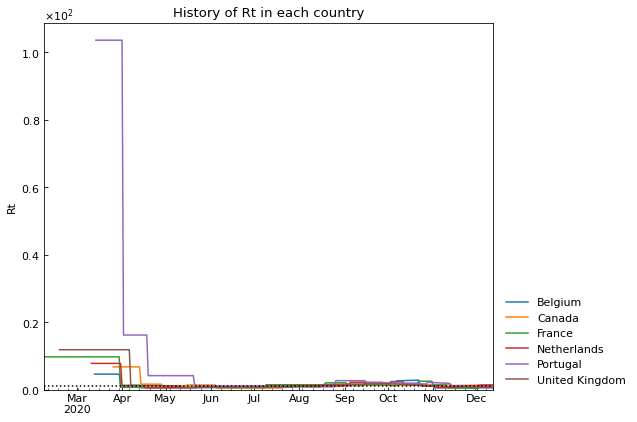

Country,Belgium,Canada,France,Netherlands,Portugal,United Kingdom
Date,,,,,,
2020-12-08,0.59,1.42,1.03,1.37,1.0,0.66
2020-12-09,0.59,1.42,1.03,1.37,1.0,0.66
2020-12-10,0.59,1.42,1.03,1.37,1.0,0.66
2020-12-11,0.59,1.42,1.03,1.37,1.0,0.66
2020-12-12,0.59,1.42,1.03,1.37,1.0,0.66


In [14]:
analyser.history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

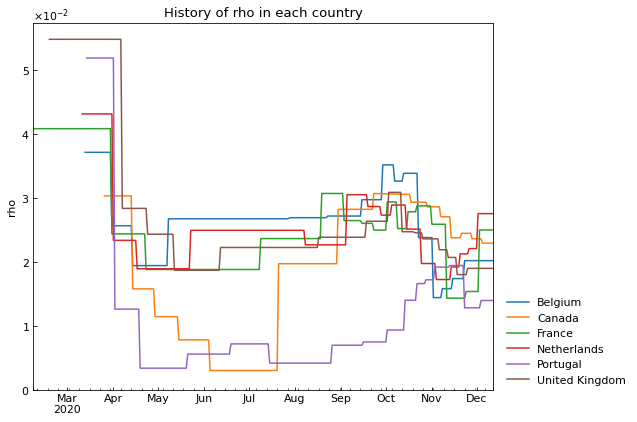

Country,Belgium,Canada,France,Netherlands,Portugal,United Kingdom
Date,,,,,,
2020-12-08,0.020162,0.022894,0.024945,0.027502,0.013934,0.018954
2020-12-09,0.020162,0.022894,0.024945,0.027502,0.013934,0.018954
2020-12-10,0.020162,0.022894,0.024945,0.027502,0.013934,0.018954
2020-12-11,0.020162,0.022894,0.024945,0.027502,0.013934,0.018954
2020-12-12,0.020162,0.022894,0.024945,0.027502,0.013934,0.018954


In [15]:
analyser.history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

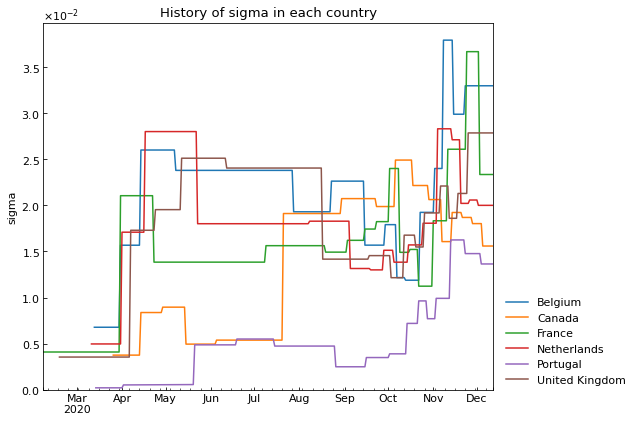

Country,Belgium,Canada,France,Netherlands,Portugal,United Kingdom
Date,,,,,,
2020-12-08,0.032986,0.015594,0.023356,0.020008,0.013646,0.027868
2020-12-09,0.032986,0.015594,0.023356,0.020008,0.013646,0.027868
2020-12-10,0.032986,0.015594,0.023356,0.020008,0.013646,0.027868
2020-12-11,0.032986,0.015594,0.023356,0.020008,0.013646,0.027868
2020-12-12,0.032986,0.015594,0.023356,0.020008,0.013646,0.027868


In [16]:
analyser.history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

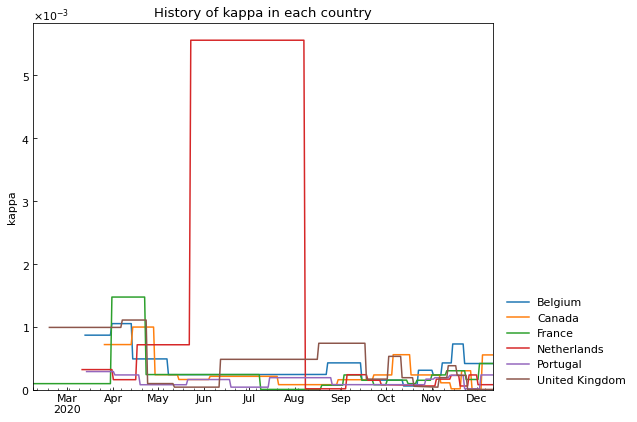

Country,Belgium,Canada,France,Netherlands,Portugal,United Kingdom
Date,,,,,,
2020-12-08,0.000416,0.000553,0.000417,0.00008,0.000235,0.000005
2020-12-09,0.000416,0.000553,0.000417,0.00008,0.000235,0.000005
2020-12-10,0.000416,0.000553,0.000417,0.00008,0.000235,0.000005
2020-12-11,0.000416,0.000553,0.000417,0.00008,0.000235,0.000005
2020-12-12,0.000416,0.000553,0.000417,0.00008,0.000235,0.000005


In [17]:
analyser.history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

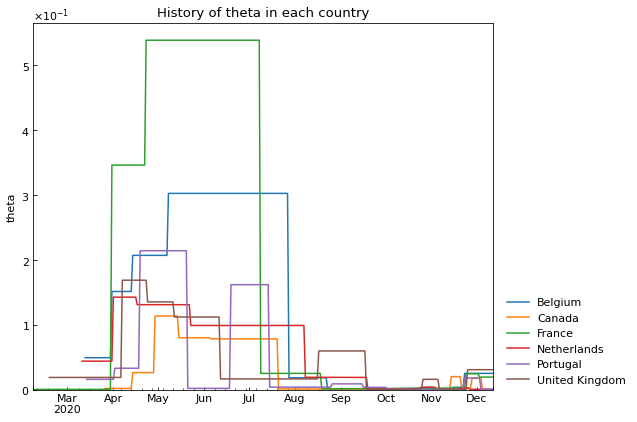

Country,Belgium,Canada,France,Netherlands,Portugal,United Kingdom
Date,,,,,,
2020-12-08,0.025196,0.000482,0.019439,0.000345,0.000673,0.030866
2020-12-09,0.025196,0.000482,0.019439,0.000345,0.000673,0.030866
2020-12-10,0.025196,0.000482,0.019439,0.000345,0.000673,0.030866
2020-12-11,0.025196,0.000482,0.019439,0.000345,0.000673,0.030866
2020-12-12,0.025196,0.000482,0.019439,0.000345,0.000673,0.030866


In [18]:
analyser.history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25141 entries, 0 to 25210
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 25141 non-null  datetime64[ns]
 1   Country                              25141 non-null  object        
 2   Rt                                   25141 non-null  float64       
 3   theta                                25141 non-null  float64       
 4   kappa                                25141 non-null  float64       
 5   rho                                  25141 non-null  float64       
 6   sigma                                25141 non-null  float64       
 7   School_closing                       25141 non-null  int64         
 8   Workplace_closing                    25141 non-null  int64         
 9   Cancel_events                        25141 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.123625,-0.022489,0.450823,-0.379798,-0.064316,-0.096874,-0.119304,-0.284088,-0.127392,-0.095907,-0.170461,-0.165407,-0.151808,-0.208347,-0.152790,-0.163035
theta,-0.123625,1.000000,0.063018,-0.212999,0.015352,0.225592,0.224652,0.265432,0.183143,0.182450,0.228915,0.295827,0.108018,0.097940,-0.250588,-0.028840,0.314663
kappa,-0.022489,0.063018,1.000000,0.113745,0.054813,-0.069639,0.023735,0.108667,-0.201065,0.075076,-0.049760,-0.069941,0.017777,0.057885,-0.134514,0.095494,-0.094152
rho,0.450823,-0.212999,0.113745,1.000000,-0.216545,-0.314884,-0.380409,-0.212767,-0.491273,-0.241965,-0.293746,-0.107184,-0.558935,-0.292226,-0.517301,-0.091167,-0.462900
sigma,-0.379798,0.015352,0.054813,-0.216545,1.000000,0.182727,0.253324,0.303508,0.441411,0.253413,0.213496,0.339196,0.092139,0.261144,0.037096,0.361653,0.277180
School_closing,-0.064316,0.225592,-0.069639,-0.314884,0.182727,1.000000,0.700460,0.090627,0.411042,0.046654,0.494438,0.144989,0.191425,0.333273,0.035886,-0.112640,0.748687
Workplace_closing,-0.096874,0.224652,0.023735,-0.380409,0.253324,0.700460,1.000000,0.421141,0.562417,0.254956,0.718191,0.290701,0.287965,0.443995,-0.044387,-0.196642,0.857254
Cancel_events,-0.119304,0.265432,0.108667,-0.212767,0.303508,0.090627,0.421141,1.000000,0.536409,0.715296,0.480406,0.688546,-0.040126,0.340587,-0.211889,-0.052861,0.520518
Gatherings_restrictions,-0.284088,0.183143,-0.201065,-0.491273,0.441411,0.411042,0.562417,0.536409,1.000000,0.559466,0.543284,0.651078,0.385531,0.555039,0.288361,0.221486,0.724808
Transport_closing,-0.127392,0.182450,0.075076,-0.241965,0.253413,0.046654,0.254956,0.715296,0.559466,1.000000,0.357376,0.665885,-0.025655,0.288383,-0.079555,0.010344,0.396549


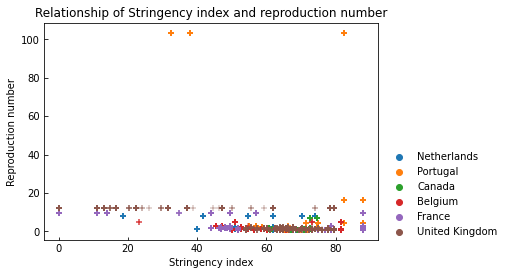

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()